<a href="https://colab.research.google.com/github/MuneefMumthas/CO538-Muneef-22206529/blob/main/CO538_CW1_MLProject_Muneef_22206529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**




This is an .ipynb file for Machine Learning project for **CO538**.

**Student Name:** Muneef Ahamed Mohamed Mumthas

**Student ID:** 22206529

**Course:** BSc (Hons) Artificial Intelligence with Foundation Year

**Module:** CO538 - Machines And Their Languages

# **Research Question**



## Can we predict house prices based on other factors, despite dealing with an unknown data format and potential quality issues?

Predicting house prices is a critical task in the real estate industry, enabling stakeholders to make informed decisions. However, it becomes challenging when dealing with datasets of unknown format and potential data quality issues. This research aims to investigate whether it is possible to predict house prices using various factors, even in the presence of these challenges.

#**Dataset Summary**



The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial as property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.

## Columns Explanation

- **Date**: The date when the property information was recorded.
- **Price**: The price of the property.
- **Bedrooms**: The number of bedrooms in the property.
- **Bathrooms**: The number of bathrooms in the property.
- **Sqft_living**: The square footage of living space in the property.
- **Sqft_lot**: The square footage of the lot where the property is located.
- **Floors**: The number of floors in the property.
- **Waterfront**: Whether the property has a waterfront view (binary: 0 for no, 1 for yes).
- **View**: An index from 0 to 4 representing the level of view the property has.
- **Condition**: An index from 1 to 5 representing the overall condition of the property.
- **Sqft_above**: The square footage of the interior space above ground level.
- **Sqft_basement**: The square footage of the basement space.
- **Yr_built**: The year the property was built.
- **Yr_renovated**: The year the property was last renovated.
- **Street**: The street address of the property.
- **City**: The city where the property is located.
- **Statezip**: The state and ZIP code of the property.
- **Country**: The country where the property is located.

**This column description is based on my analysis of the dataset CSV file.**


#**Importing The Libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing The Dataset**


In [28]:
path = "/content/drive/MyDrive/HousingData.csv"

df = pd.read_csv(path)



In [29]:
df.head()
# sampling the dataset by showing the first five rows

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#**Exploratory Data Analysis (EDA)**


### **Data Preprocessing**

In [30]:
# changing the float format to make it easier to understand
pd.set_option('display.float_format', lambda x: format(x, '.2f'))
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [31]:
# checking the number of rows and columns
df.shape

(4600, 18)

In [32]:
# checking whether the columns have appropriate data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We can see that the datatypes for bedrooms, bathrooms and floors are not the expected types (they can't be float).

In [33]:
# changing the dtype of floors, bedrooms and bathrooms to 'int'
df[['bedrooms','bathrooms', 'floors']] = df[['bedrooms','bathrooms', 'floors']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   int64  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int64  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [34]:
# checking the number of rows where the price is 0
(df['price']==0).sum(0)

49

There are **49** rows where the price is **0**. Since the price of a house cannot be 0, we can consider them as missing values and either replace them with the average price or remove them entirely from our dataset. **I chose to remove them**, as replacing them with the mean price might weaken the predictive power.

In [35]:
# Deleting rows where price is 0
df = df[df['price'] != 0]
len(df)
# 4600 - 49 = 4551

4551

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [37]:
# dropping the features/columns that do not affect the predictive power.
df.drop(['street', 'date', 'country'], axis=1, inplace=True)


In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.00,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.00,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.00,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.00,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [39]:
df.shape

(4551, 15)

**Checking for outliers:**

In [40]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00
mean,557905.90,3.39,1.78,2132.37,14835.28,1.46,0.01,0.23,3.45,1822.22,310.15,1970.80,808.56
std,563929.87,0.90,0.74,955.95,35964.08,0.55,0.08,0.77,0.68,854.45,461.99,29.76,979.42
min,7800.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,326264.29,3.00,1.00,1460.00,5000.00,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,465000.00,3.00,2.00,1970.00,7680.00,1.00,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,657500.00,4.00,2.00,2610.00,10978.00,2.00,0.00,0.00,4.00,2300.00,600.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.00,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


<ipython-input-41-cd1c55d9323b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

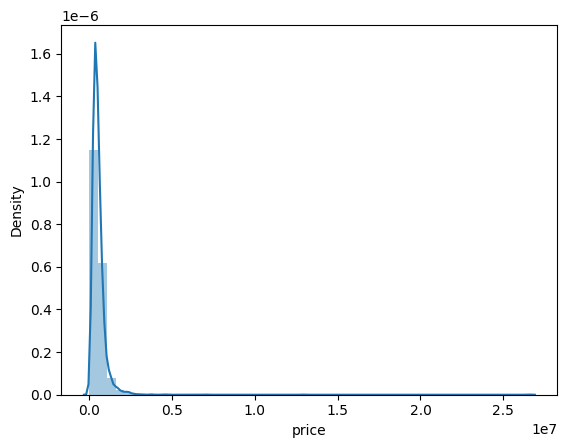

In [41]:
#checking for outlier using distplot
sns.distplot(df['price'])

<Axes: ylabel='price'>

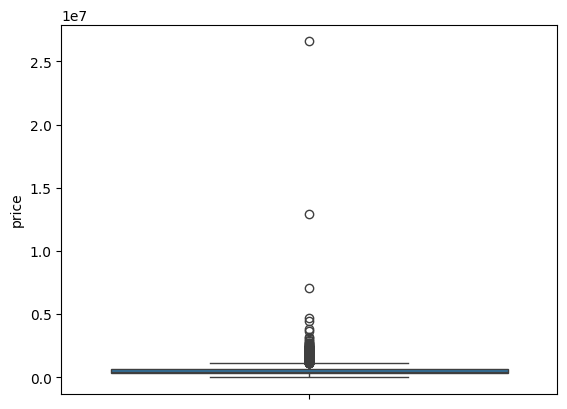

In [42]:
# using boxplot to see the outliers more clearly
sns.boxplot(df['price'])

**Handling the outliers using the IQR (Interquartile Range) Method.**

In [43]:
# First Quartile
q1 = df['price'].quantile(0.25)

# Third Quartile
q3 = df['price'].quantile(0.75)

# Inter Quartile Range
iqr = q3-q1

q1, q3, iqr

(326264.2857145, 657500.0, 331235.7142855)

In [44]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

# values outside this range will be considered as outliers
lower_limit, upper_limit

(-170589.28571375, 1154353.57142825)

<Axes: ylabel='price'>

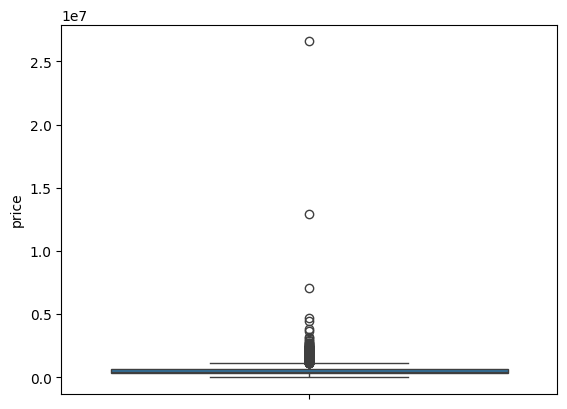

In [45]:
# Before Handling Outliers
sns.boxplot(df['price'])

In [46]:
# Capping - Changing the outlier values to upper (or) Lower Limit values

df.loc[(df['price']>upper_limit), 'price'] = upper_limit

df.loc[(df['price']<lower_limit), 'price'] = lower_limit



Using the upper and lower limits, I capped the outliers instead of removing them completely. As removing outliers entirely from the dataset might lead to a loss of valuable information.

<Axes: ylabel='price'>

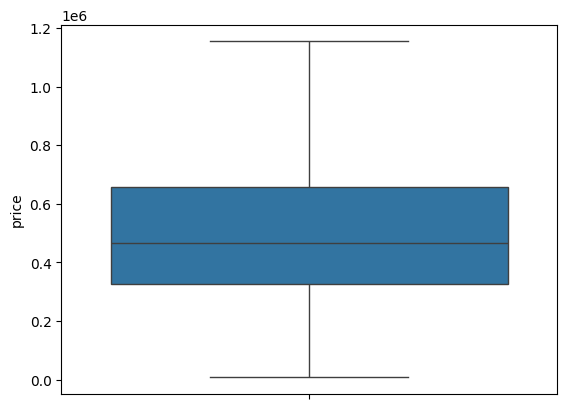

In [47]:
# After Handling Outliers
sns.boxplot(df['price'])

<ipython-input-48-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

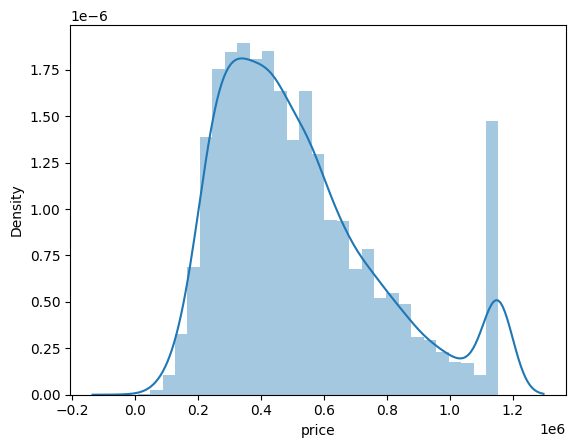

In [48]:
sns.distplot(df['price'])


### **Checking out the distributions of categorical data/variables against price to get insights:**

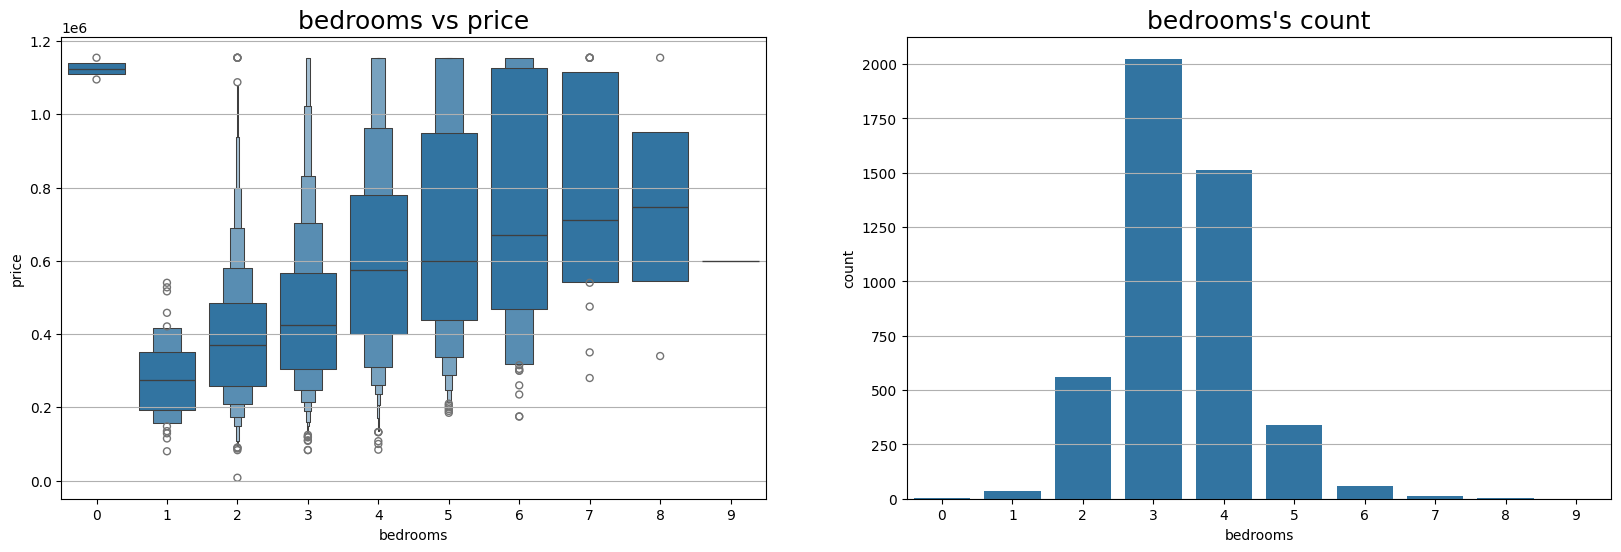

In [49]:
plt.figure(figsize=(20, 6))

# Boxen plot for bedrooms vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='bedrooms', y='price')
ax.set_title('bedrooms vs price', fontdict={'fontsize': 18})

# Countplot for bedrooms
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['bedrooms'])
ax.set_title('bedrooms\'s count', fontdict={'fontsize': 18})

plt.show()